In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [31]:
data = pd.read_csv('auscafe.csv', parse_dates=['date'], index_col='date', usecols=["Y", "date"])

train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

train_data.tail()

,Y
date,
2010-03-01,2.6075
2010-04-01,2.5358
2010-05-01,2.5714
2010-06-01,2.5049
2010-07-01,2.7813


/home/rip/Documents/PCD/PCDLabs/Labo8/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/rip/Documents/PCD/PCDLabs/Labo8/.venv/lib/python3.13/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


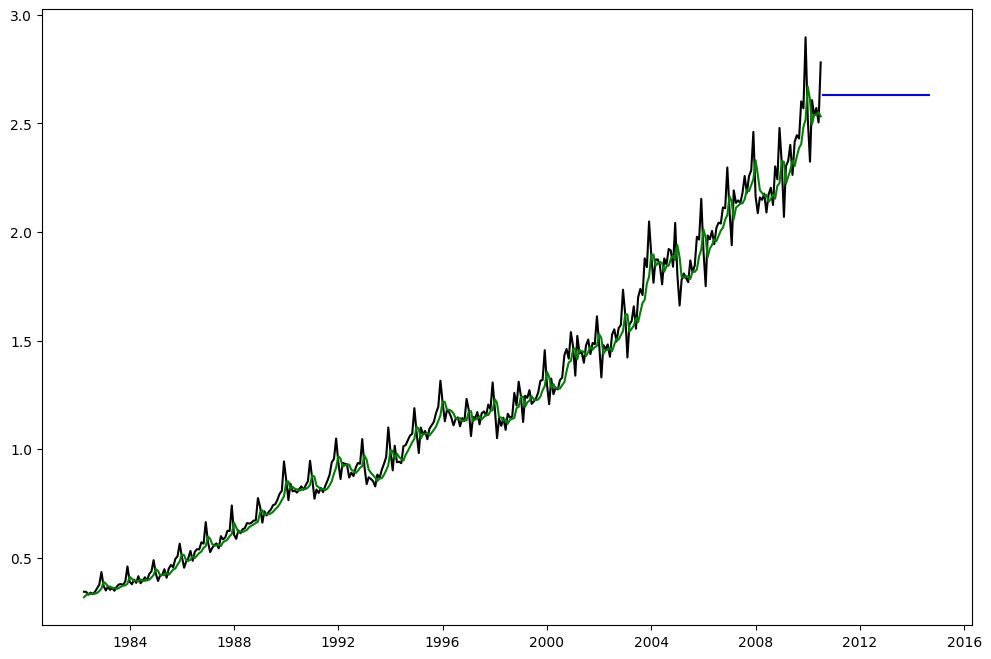

In [32]:
fit = SimpleExpSmoothing(train_data, initialization_method="heuristic").fit(
    smoothing_level=0.4, optimized=True
)

fcast = fit.forecast(50)

plt.figure(figsize=(12, 8))
plt.plot(train_data, color="black")
plt.plot(fit.fittedvalues, color="green")
plt.plot(fcast, color="blue")